In [1]:
%matplotlib inline
import numpy as np
import numpy.ma as ma
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
import timeit
import line_profiler

import datetime

from io import StringIO
from pandas.api.types import CategoricalDtype

import pandas._testing as tm

## returns df from string data
def g(data):
    return pd.read_csv(StringIO(data))

In [44]:
df1[df1.keyword.isin(df2['text to check'])]

,keyword
1,def
2,ghi


In [78]:
df = pd.DataFrame({'col1': ['Hello, world. Good day','My name is Bob. Call Me','good evening','yep. stack Overflow.',"Ain't McDonald Yo"]})
df

,col1
0,"Hello, world. Good day"
1,My name is Bob. Call Me
2,good evening
3,yep. stack Overflow.
4,Ain't McDonald Yo


In [91]:
for i in df.col1.str.split(" ").str[1:]:
    [print(s.istitle()) for s in i]

False
True
False
False
False
True
True
True
False
False
True
False
True


In [83]:
'abc'.capitalize()

'Abc'

In [26]:
d="""colA,colB,colC
0.4,2,test1
0.7,3,test2
0.8,4,test3"""
df=g(d)
df

,colA,colB,colC
0,0.4,2,test1
1,0.7,3,test2
2,0.8,4,test3


In [23]:
'colA'+df['colA'].astype(str)+' colB'+df['colB'].astype(str)+' colC'+df['colC'].astype(str)

0    colA0.4 colB2 colCtest1
1    colA0.7 colB3 colCtest2
2    colA0.8 colB4 colCtest3
dtype: object

In [78]:
d="""DATE,EVENT
01/02/2019,x has been attacked
01/02/2019,y has been attacked
01/02/2019,x attacked
03/02/2019,z attacked
03/02/2019,f attacked
04/02/2019,a attacked
05/02/2019,l attacked
05/02/2019,q attacked"""
df=pd.read_csv(StringIO(d))
df
df['DATE']  = pd.to_datetime(df.DATE, dayfirst=True)
#df.groupby([pd.Grouper(key='DATE')]).count().reset_index().rename(columns={'EVENT':'Number of Events'})
#df['DATE']  = pd.to_datetime(df.DATE, dayfirst=True)
#df.resample('D',on='DATE').count().drop('DATE',1).reset_index().rename(columns={'EVENT':'Number of Events'})
df.groupby('DATE').count().reset_index().rename(columns={'EVENT':'Number of Events'})

,DATE,Number of Events
0,2019-02-01,3
1,2019-02-03,2
2,2019-02-04,1
3,2019-02-05,2


In [76]:
df.set_index('DATE').resample('D').count().reset_index().rename(columns={'EVENT':'Number of Events'})

,DATE,Number of Events
0,2019-02-01,3
1,2019-02-02,0
2,2019-02-03,2
3,2019-02-04,1
4,2019-02-05,2


In [116]:
import re
l = ["VISTA AES TIETE E UNT N2 600.",
"VISTA IT AUUNIBANCO PN N1 1.400",
"OPCAO DE VENDA 04/21 COGNP450ON 4,50COGNE 100.000"]



In [118]:
df=DataFrame({
    'col':l
})
df.col.str.extract('(\d*\.*\d*)?$').astype(str).replace('\.','', regex=True)

,0
0,nan
1,1400
2,100000


In [155]:
d="""id,coord_id,val1,val2,record,val3
snp,chr15_1-1000,1.0,0.9,xx12,2
snv,chr15_1-1000,1.0,0.7,yy12,-4
ins,chr15_1-1000,0.01,0.7,jj12,-4
ins,chr15_1-1000,1.0,1.5,zzy1,-5
ins,chr15_1-1000,1.0,1.5,zzy1,-5
del,chr10_2000-4000,0.1,1.2,j112,12
del,chr10_2000-4000,0.4,1.1,jh12,15"""
df=g(d)
df

,id,coord_id,val1,val2,record,val3
0,snp,chr15_1-1000,1.00,0.9,xx12,2
1,snv,chr15_1-1000,1.00,0.7,yy12,-4
2,ins,chr15_1-1000,0.01,0.7,jj12,-4
3,ins,chr15_1-1000,1.00,1.5,zzy1,-5
4,ins,chr15_1-1000,1.00,1.5,zzy1,-5
5,del,chr10_2000-4000,0.10,1.2,j112,12
6,del,chr10_2000-4000,0.40,1.1,jh12,15


In [160]:
df.stack().unstack(1)

,id,coord_id,val1,val2,record,val3
0,snp,chr15_1-1000,1.0,0.9,xx12,2
1,snv,chr15_1-1000,1.0,0.7,yy12,-4
2,ins,chr15_1-1000,0.01,0.7,jj12,-4
3,ins,chr15_1-1000,1.0,1.5,zzy1,-5
4,ins,chr15_1-1000,1.0,1.5,zzy1,-5
5,del,chr10_2000-4000,0.1,1.2,j112,12
6,del,chr10_2000-4000,0.4,1.1,jh12,15


In [162]:
d="""Col1,Col2
A,1
B,1
A,2
A,7
B,6"""
df=pd.read_csv(StringIO(d))
df

,Col1,Col2
0,A,1
1,B,1
2,A,2
3,A,7
4,B,6


In [163]:
#df['num less than 5'] = 
df1 = df[df.groupby('Col1').Col2.apply(lambda x: x<5)].groupby('Col1').agg('max').reset_index()
df2 = df.groupby('Col1', as_index=False).Col2.agg(['count', 'min','max']).reset_index()
df = df1.merge(df2, on='Col1').rename(columns= {
    'Col2':'numbers_under_5',
    'count':'total_numbers',
    'min':'lowest',
    'max':'highest'
})
df

,Col1,numbers_under_5,total_numbers,lowest,highest
0,A,2,3,1,7
1,B,1,2,1,6


In [215]:
from dateutil.parser import parse

df=pd.DataFrame({
    'Date':['20201203', '05/06/20', '2019-09-15 00:00:1568480400']
})
df.Date = df.Date.str.split(' ',1).str[0]
df

,Date
0,20201203
1,05/06/20
2,2019-09-15


In [216]:
df["Date"] = pd.to_datetime(df["Date"]).dt.strftime("%Y-%m-%d")
df

,Date
0,2020-12-03
1,2020-05-06
2,2019-09-15


In [203]:
df['Date'] = df['Date'].apply(parse).dt.strftime("%Y-%m-%d")
df

,Date
0,2020-12-03
1,2020-05-06
2,2019-09-15


In [212]:
for i in range(len(df['Date'])):
    df['Date'][i] = parse(df['Date'][i])
df['Date'] = pd.to_datetime(df['Date']).dt.strftime("%Y-%m-%d")
df

,Date
0,2020-12-03
1,2020-05-06
2,2019-09-15


In [244]:
d="""date
2018-01-01
2018-01-01
2018-01-01
2021-01-08
2021-01-08"""
df=pd.read_csv(StringIO(d))
df


,date
0,2018-01-01
1,2018-01-01
2,2018-01-01
3,2021-01-08
4,2021-01-08


In [262]:
x in pd.to_datetime(df.date).dt.date.values

True

In [254]:
df.loc[pd.to_datetime(df.date) == pd.Timestamp('2018.1.1')]
df.loc[pd.to_datetime(df.date) == '2018.1.1']
df.loc[pd.to_datetime(df.date).dt.date == datetime.date(2018, 1, 1)]
df[pd.to_datetime(df.date) == pd.Timestamp('2018.1.1')]
df[pd.to_datetime(df.date) == '2018.1.1']
df.loc[pd.to_datetime(df.date).dt.date == datetime.date(2018, 1, 1)]

,date
0,2018-01-01
1,2018-01-01
2,2018-01-01


In [224]:
x = datetime.date(2018, 1, 1)
print(type(x))
x in pd.to_datetime(df.date).dt.date

<class 'datetime.date'>


False

In [230]:
x in pd.to_datetime(df.date)
pd.Timestamp('2018.1.1') == pd.to_datetime(df.date)

0     True
1     True
2     True
3     True
4     True
5    False
6    False
Name: date, dtype: bool

In [238]:
(pd.to_datetime(df.date) == pd.Timestamp("2018.1.1")).any()
(pd.to_datetime(df.date).dt.date == pd.Timestamp("2018.1.1")).any()


True

In [240]:
x = datetime.date(2018, 1, 1)
(pd.to_datetime(df.date) == x).any()
#(pd.to_datetime(df.date).dt.date == x).any()

False

In [293]:
db_columns_list = ['col1', 'col2', 'col3']
df=DataFrame({
    'col1':[1,2,3],
    'col3':[3,4,5]
})
#df[df.columns & db_columns_list]
df[set(df.columns).intersection(set(db_columns_list))]
df.index=[0,1,np.nan]
df
df[set(df.columns).intersection(set(db_columns_list))]
df[df.columns.intersection(db_columns_list)]

,col1,col3
0.0,1,3
1.0,2,4
NaN,3,5


In [294]:
import io
d="""ItemID, NameID, Users, Days, Pricing, Expiration, Status
370915293,aaaaqqq.abc,0,0,$12,05/10/2021 11:44,Ran
371192969,aaacns.abc,7,0,$12,05/08/2021 09:34,Ran
370905229,aaamix.abc,0,0,$12,05/07/2021 10:32,Ran
371459366,aaapdf.abc,28,0,$12,05/11/2021 12:55,Ran"""
df=pd.read_csv(StringIO(d), sep=',|;')
df

<ipython-input-294-81fd6826a096>:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df=pd.read_csv(StringIO(d), sep=',|;')


,ItemID,NameID,Users,Days,Pricing,Expiration,Status
0,370915293,aaaaqqq.abc,0,0,$12,05/10/2021 11:44,Ran
1,371192969,aaacns.abc,7,0,$12,05/08/2021 09:34,Ran
2,370905229,aaamix.abc,0,0,$12,05/07/2021 10:32,Ran
3,371459366,aaapdf.abc,28,0,$12,05/11/2021 12:55,Ran


In [279]:
d="""pred,subj,obj
nationality,BART,USA"""
head_df = g(d)
head_df

,pred,subj,obj
0,nationality,BART,USA


In [282]:
d="""pred_x,subj_x,obj_x,pred_y,subj_y,obj_y
nationality,BART,USA,placeOfBirth,BART,NEWYORK
nationality,BART,USA,hasFather,BART,HOMMER"""
body_df = g(d)
body_df

,pred_x,subj_x,obj_x,pred_y,subj_y,obj_y
0,nationality,BART,USA,placeOfBirth,BART,NEWYORK
1,nationality,BART,USA,hasFather,BART,HOMMER


In [363]:
d="""Date,Train,Station,Time,ID
02.10.2020,Flixtrain,London,10:40,1
02.10.2020,Flixtrain,Berlin,20:30,1
02.10.2020,Flixtrain,Hamburg,23:45,1
02.10.2020,VSOE,Amesterdam,21:30,2
02.10.2020,VSOE,Cologne,00:50,2
02.10.2020,VSOE,Berlin,04:30,2
02.10.2020,ICE-220,Warschau,12:35,3
02.10.2020,ICE-220,Breslau,17:40,3
02.10.2020,ICE-220,Prag,23:13,3
02.10.2020,ICE-342,Wien,00:35,4
02.10.2020,ICE-342,Salzburg,07:42,4
02.10.2020,ICE-342,Munich,13:13,4"""
df=g(d)
df

,Date,Train,Station,Time,ID
0,02.10.2020,Flixtrain,London,10:40,1
1,02.10.2020,Flixtrain,Berlin,20:30,1
2,02.10.2020,Flixtrain,Hamburg,23:45,1
3,02.10.2020,VSOE,Amesterdam,21:30,2
4,02.10.2020,VSOE,Cologne,00:50,2
5,02.10.2020,VSOE,Berlin,04:30,2
6,02.10.2020,ICE-220,Warschau,12:35,3
7,02.10.2020,ICE-220,Breslau,17:40,3
8,02.10.2020,ICE-220,Prag,23:13,3
9,02.10.2020,ICE-342,Wien,00:35,4


In [364]:
df['t'] = pd.to_datetime(df.Time, format='%H:%M')
df.Date = pd.to_datetime(df.Date, dayfirst=True)

cond = df.groupby(['Train','ID']
                 ).t.transform('first') - df.groupby(
    ['Train','ID']).t.transform(
          lambda x: x.values) > pd.Timedelta('0 days')

df.Date = df.Date.mask(cond,df.Date + pd.Timedelta(days=1))
df = df.drop('t',1)
df


,Date,Train,Station,Time,ID
0,2020-10-02,Flixtrain,London,10:40,1
1,2020-10-02,Flixtrain,Berlin,20:30,1
2,2020-10-02,Flixtrain,Hamburg,23:45,1
3,2020-10-02,VSOE,Amesterdam,21:30,2
4,2020-10-03,VSOE,Cologne,00:50,2
5,2020-10-03,VSOE,Berlin,04:30,2
6,2020-10-02,ICE-220,Warschau,12:35,3
7,2020-10-02,ICE-220,Breslau,17:40,3
8,2020-10-02,ICE-220,Prag,23:13,3
9,2020-10-02,ICE-342,Wien,00:35,4


In [369]:
data_df = pd.DataFrame({
    "Reference": ("A", "A", "A", "B", "C", "C", "D", "E"),
    "Value1": ("U", "U", "U--","V", "W", "W--", "X", "Y"),
    "Value2": ("u", "u--", "u","v", "w", "w", "x", "y")
    }, index=[1, 2, 3, 4, 5, 6, 7, 8])
truth_df = pd.DataFrame({
    "Reference": ("A", "B", "C", "D", "E"),
    "Value1": ("U", "V", "W", "X", "Y"),
    "Value2": ("u", "v", "w", "x", "y")
    }, index=[1, 4, 5, 7, 8])
data_df

,Reference,Value1,Value2
1,A,U,u
2,A,U,u--
3,A,U--,u
4,B,V,v
5,C,W,w
6,C,W--,w
7,D,X,x
8,E,Y,y


In [370]:
truth_df

,Reference,Value1,Value2
1,A,U,u
4,B,V,v
5,C,W,w
7,D,X,x
8,E,Y,y


In [373]:
data_df.filter(like='Value').isin(truth_df.filter(like='Value'))

,Value1,Value2
1,True,True
2,False,False
3,False,False
4,True,True
5,True,True
6,False,False
7,True,True
8,True,True


In [368]:
df_out = data_df.merge(truth_df, on=['Reference', 'Value1','Value2'], how='left', indicator=True).rename(columns={"_merge":"Issues"})
#df_out["Issues"] = np.where(df_out["Issues"] == "left_only", "Flag", "")
df_out

,Reference,Value1,Value2,Issues
0,A,U,u,both
1,A,U,u--,left_only
2,A,U--,u,left_only
3,B,V,v,both
4,C,W,w,both
5,C,W--,w,left_only
6,D,X,x,both
7,E,Y,y,both


In [17]:
d="""buying date,selling date
2000-01-04,2000-04-15"""
df=g(d)
df['buying date']=pd.to_datetime(df['buying date'])
df['selling date']=pd.to_datetime(df['selling date'])
df

,buying date,selling date
0,2000-01-04,2000-04-15


In [32]:
df1=DataFrame({
    'me':pd.date_range(start=df['buying date'].iloc[0], 
                          end=df['selling date'].iloc[0], freq='M'),
    'ms':pd.date_range(start=df['buying date'].iloc[0], 
                          end=df['selling date'].iloc[0], freq='MS')
})
df1
#df1.T.set_index(0).index.union(ms)
#.union(me).to_frame().sort_index()

,me,ms
0,2000-01-31,2000-02-01
1,2000-02-29,2000-03-01
2,2000-03-31,2000-04-01


In [73]:
df = pd.DataFrame()
df['year'] = [2011,2011,2011,2011,2011,2011,2011,2011,2011,2011,2011,2011]
df['month'] = [1,2,3,4,5,6,1,2,3,4,5,6]
df['after'] = [0,0,0,1,1,1,0,0,0,1,1,1]
df['campaign'] = [0,0,0,0,0,0,1,1,1,1,1,1]
df['sales'] = [10000,11000,12000,10500,10000,9500,7000,8000,5000,6000,6000,7000]
df.head()

,year,month,after,campaign,sales
0,2011,1,0,0,10000
1,2011,2,0,0,11000
2,2011,3,0,0,12000
3,2011,4,1,0,10500
4,2011,5,1,0,10000


In [74]:
df['date'] = pd.to_datetime(df.year.astype(str) + '-' + df.month.astype(str))

In [77]:
df['date'] = pd.to_datetime(df.year.astype(str) + '-' + df.month.astype(str)).dt.to_period('M')

In [127]:
d="""pred,subj,obj
nationality,BART,USA
placeOfBirth,BART,NEWYORK
locatedIn,NEWYORK,USA
hasFather,BART,HOMMER
nationality,HOMMER,USA
placeOfBirth,HOMMER,NEWYORK"""
KG = pd.read_csv(StringIO(d))
for i in range(23):
    KG = pd.concat([KG,KG])
KG.shape

(50331648, 3)

In [132]:
%timeit KG[KG['subj'].isin(['BART', 'NEWYORK']) & KG['obj'].isin(['USA', 'HOMMER'])]

4.17 s ± 152 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [117]:
%timeit KG.query("(subj in ['BART', 'NEWYORK']) & (obj in ['USA', 'HOMMER'])")

5.12 s ± 517 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [131]:
%timeit KG.query("(subj in ['BART', 'NEWYORK']) and (obj in ['USA', 'HOMMER'])")

5.1 s ± 289 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [129]:
%timeit KG.query("(subj.isin(['BART', 'NEWYORK']))& (obj.isin(['USA', 'HOMMER']))")

4.99 s ± 210 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [133]:
df = pd.DataFrame({'ID': ['1', '1', '1', '1', '2', '2', '3', '3', '3', '4', '4', '4', '4', '5', '5', '5'],
                   'group': ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B'],
                   'attempts': ['0', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '0', '0', '1', '0'],
                   'successes': ['1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1', '0', '1'],
                   'score': [None, '5', '5', '4', '5', '4', '5', None, '1', '5', '0', '1', None, None, '1', None]
                   })
df

,ID,group,attempts,successes,score
0,1,A,0,1,None
1,1,A,1,0,5
2,1,A,1,0,5
3,1,A,1,0,4
4,2,A,1,0,5
5,2,A,1,0,4
6,3,A,1,0,5
7,3,A,0,1,None
8,3,A,1,0,1
9,4,B,1,0,5


In [191]:
df=DataFrame({
    'No Show (%)':[5e-01, 4e-01]
})
df

,No Show (%)
0,0.5
1,0.4


In [192]:
df['No Show (%)'] = df['No Show (%)'].transform(lambda x: '{:,.2%}'.format(x)).astype(float)
df

ValueError: could not convert string to float: '50.00%'

In [149]:
d="""ID,March_Number,March_Amount
A,10,200
B,4, 300
C,2, 100"""
df1=g(d)
df1

,ID,March_Number,March_Amount
0,A,10,200
1,B,4,300
2,C,2,100


In [150]:
d="""ID,Feb_Number,Feb_Amount
A,1,00
B,8,500
E,4,400
F,8,00
H,4,200"""
df2=g(d)
df2

,ID,Feb_Number,Feb_Amount
0,A,1,0
1,B,8,500
2,E,4,400
3,F,8,0
4,H,4,200


In [152]:
d="""ID,Jan_Number,Jan_Amount
A,6,800
H,3,500
B,1,50
G,8,100"""
df3=g(d)
df3

,ID,Jan_Number,Jan_Amount
0,A,6,800
1,H,3,500
2,B,1,50
3,G,8,100


In [154]:
from functools import reduce
dfl=[df1, df2, df3]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['ID'],
                                            how='outer'), dfl)

In [155]:
df_merged

,ID,March_Number,March_Amount,Feb_Number,Feb_Amount,Jan_Number,Jan_Amount
0,A,10.0,200.0,1.0,0.0,6.0,800.0
1,B,4.0,300.0,8.0,500.0,1.0,50.0
2,C,2.0,100.0,NaN,NaN,NaN,NaN
3,E,NaN,NaN,4.0,400.0,NaN,NaN
4,F,NaN,NaN,8.0,0.0,NaN,NaN
5,H,NaN,NaN,4.0,200.0,3.0,500.0
6,G,NaN,NaN,NaN,NaN,8.0,100.0


In [159]:
from threading import Thread

def foo(bar):
    return 'foo'

thread = Thread(target=foo, args=('world!',))
thread.start()
ret = thread.join()
print (ret)

None


In [163]:
import concurrent.futures

def foo(bar):
    print('hello {}'.format(bar))
    return 'foo'

with concurrent.futures.ThreadPoolExecutor(max_workers=2) as executor:
    future = executor.submit(foo, 'world!')
    return_value = future.result()
    print(return_value)

hello world!
foo


In [171]:
import yfinance as yf
df = yf.download(tickers='AAPL', start='2019-01-01', end='2021-01-01', period=max, interval='1d')

AttributeError: module 'yfinance' has no attribute 'download'

In [176]:
d = {'Name1':['jaap','piet','tim'],'Name2':['bas','max','piet'], 'Count1':[1,5,2],'Count2' :[2,6,8]}

data = pd.DataFrame(d)
data

,Name1,Name2,Count1,Count2
0,jaap,bas,1,2
1,piet,max,5,6
2,tim,piet,2,8


In [177]:
data.groupby(['Name1','Count1']).sample()

,Name1,Name2,Count1,Count2
0,jaap,bas,1,2
1,piet,max,5,6
2,tim,piet,2,8


In [178]:
d="""ID,Value1,Value2    
ID_1,NaN,2  
ID_2,NaN,7    
ID_1,5,NaN   
ID_2,8,NaN"""
df=g(d)
df

,ID,Value1,Value2
0,ID_1,NaN,2
1,ID_2,NaN,7
2,ID_1,5.0,NaN
3,ID_2,8.0,NaN


In [19]:
df=DataFrame({
    'No Show (%)':[5e-01, 4e-01, np.nan]
})
df

,No Show (%)
0,0.5
1,0.4
2,NaN


In [20]:
df['No Show (%)'] = df['No Show (%)'].transform(lambda x: '{:,.2%}'.format(x))
df

,No Show (%)
0,50.00%
1,40.00%
2,nan%


<AxesSubplot:>

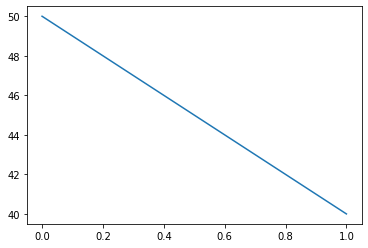

In [21]:
df['No Show (%)'].replace('\%','', regex=True).astype(float).plot()

In [22]:
df = pd.DataFrame({'A':np.arange(1.0,9.0)},index=pd.date_range(start='2020-05-04 08:00:00', freq='1d', periods=8))
df

,A
2020-05-04 08:00:00,1.0
2020-05-05 08:00:00,2.0
2020-05-06 08:00:00,3.0
2020-05-07 08:00:00,4.0
2020-05-08 08:00:00,5.0
2020-05-09 08:00:00,6.0
2020-05-10 08:00:00,7.0
2020-05-11 08:00:00,8.0


In [23]:
ref_date = '2020-05-08'

In [24]:
df['Condi'] = np.where(df.index < ref_date, 'Before', 'After')
df

,A,Condi
2020-05-04 08:00:00,1.0,Before
2020-05-05 08:00:00,2.0,Before
2020-05-06 08:00:00,3.0,Before
2020-05-07 08:00:00,4.0,Before
2020-05-08 08:00:00,5.0,After
2020-05-09 08:00:00,6.0,After
2020-05-10 08:00:00,7.0,After
2020-05-11 08:00:00,8.0,After
